In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the csv file to create the dataframe
df=pd.read_csv('Andhiyarkore.csv')
df

,Day,Data Type,Mean Gauge (m),Discharge (cumecs),Observed/Computed
0,1/9/1977,HHS,252.000,0.0,O
1,2/9/1977,HHS,252.000,0.0,O
2,3/9/1977,HHS,252.000,0.0,O
3,4/9/1977,HHS,252.000,0.0,O
4,5/9/1977,HHS,252.000,0.0,O
...,...,...,...,...,...
14234,20/4/2017,HHS,253.470,NaN,NaN
14235,21/4/2017,HHS,253.455,NaN,NaN
14236,22/4/2017,HHS,253.440,NaN,NaN
14237,23/4/2017,HHS,253.440,NaN,NaN


In [3]:
# change the date time format and create columns for year,months and days
from datetime import datetime
df['Day'] = pd.to_datetime(df['Day'], format='%d/%m/%Y')
df['Year']=pd.to_datetime(df['Day']).dt.year
df['Month']=pd.to_datetime(df['Day']).dt.month
df['Days']=pd.to_datetime(df['Day']).dt.day
df

,Day,Data Type,Mean Gauge (m),Discharge (cumecs),Observed/Computed,Year,Month,Days
0,1977-09-01,HHS,252.000,0.0,O,1977,9,1
1,1977-09-02,HHS,252.000,0.0,O,1977,9,2
2,1977-09-03,HHS,252.000,0.0,O,1977,9,3
3,1977-09-04,HHS,252.000,0.0,O,1977,9,4
4,1977-09-05,HHS,252.000,0.0,O,1977,9,5
...,...,...,...,...,...,...,...,...
14234,2017-04-20,HHS,253.470,NaN,NaN,2017,4,20
14235,2017-04-21,HHS,253.455,NaN,NaN,2017,4,21
14236,2017-04-22,HHS,253.440,NaN,NaN,2017,4,22
14237,2017-04-23,HHS,253.440,NaN,NaN,2017,4,23


In [36]:
#to create a dataframe for the month of june july august and september
selected_months=df[df['Month'].isin([6,7,8,9])]
new_df=selected_months.groupby(['Year','Month'])['Discharge (cumecs)']
new_df = pd.DataFrame({'Year':selected_months['Year'].values,'Month':selected_months['Month'].values,
                       'Discharge':selected_months['Discharge (cumecs)'].values})

new_df

,Year,Month,Discharge
0,1977,9,0.0
1,1977,9,0.0
2,1977,9,0.0
3,1977,9,0.0
4,1977,9,0.0
...,...,...,...
4744,2016,9,NaN
4745,2016,9,NaN
4746,2016,9,NaN
4747,2016,9,NaN


In [38]:
#missing values in above dataframe
pd.isna(new_df['Discharge']).count()

4749

In [75]:
new_df['Discharge'] = new_df['Discharge'].fillna(0)  # Replacing NaN values with 0

grouped_discharge = new_df.pivot(columns='Month', values='Discharge')


grouped_discharge.columns = ['June', 'July', 'August', 'September']

grouped_discharge['June']=grouped_discharge['June'].fillna(0)
grouped_discharge['July']=grouped_discharge['July'].fillna(0)
grouped_discharge['August']=grouped_discharge['August'].fillna(0)
grouped_discharge['September']=grouped_discharge['September'].fillna(0)
grouped_discharge

,June,July,August,September
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
4744,0.0,0.0,0.0,0.0
4745,0.0,0.0,0.0,0.0
4746,0.0,0.0,0.0,0.0
4747,0.0,0.0,0.0,0.0


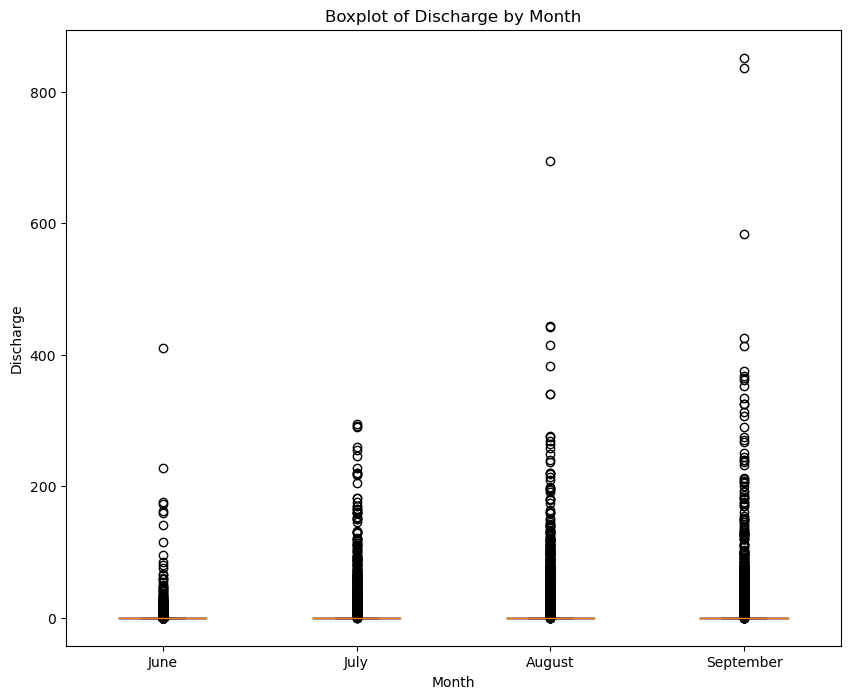

In [76]:
plt.figure(figsize=(10, 8))
plt.boxplot([grouped_discharge['June'],grouped_discharge['July'],
            grouped_discharge['August'],grouped_discharge['September']])
plt.xlabel('Month')
plt.ylabel('Discharge')
plt.title('Boxplot of Discharge by Month')
plt.xticks(range(1, 5), ['June', 'July', 'August', 'September'])  
plt.show()

In [73]:
# annual maximum streamflows
annual_max=df.groupby('Year')['Discharge (cumecs)'].max()
annual_max=pd.DataFrame({'Year':annual_max.index,'Annual_Max':annual_max.values})
annual_max

,Year,Annual_Max
0,1977,12.100
1,1978,414.768
2,1979,694.636
3,1980,240.500
4,1981,126.880
5,1982,133.854
6,1983,367.658
7,1984,141.030
8,1985,220.040
9,1986,129.230


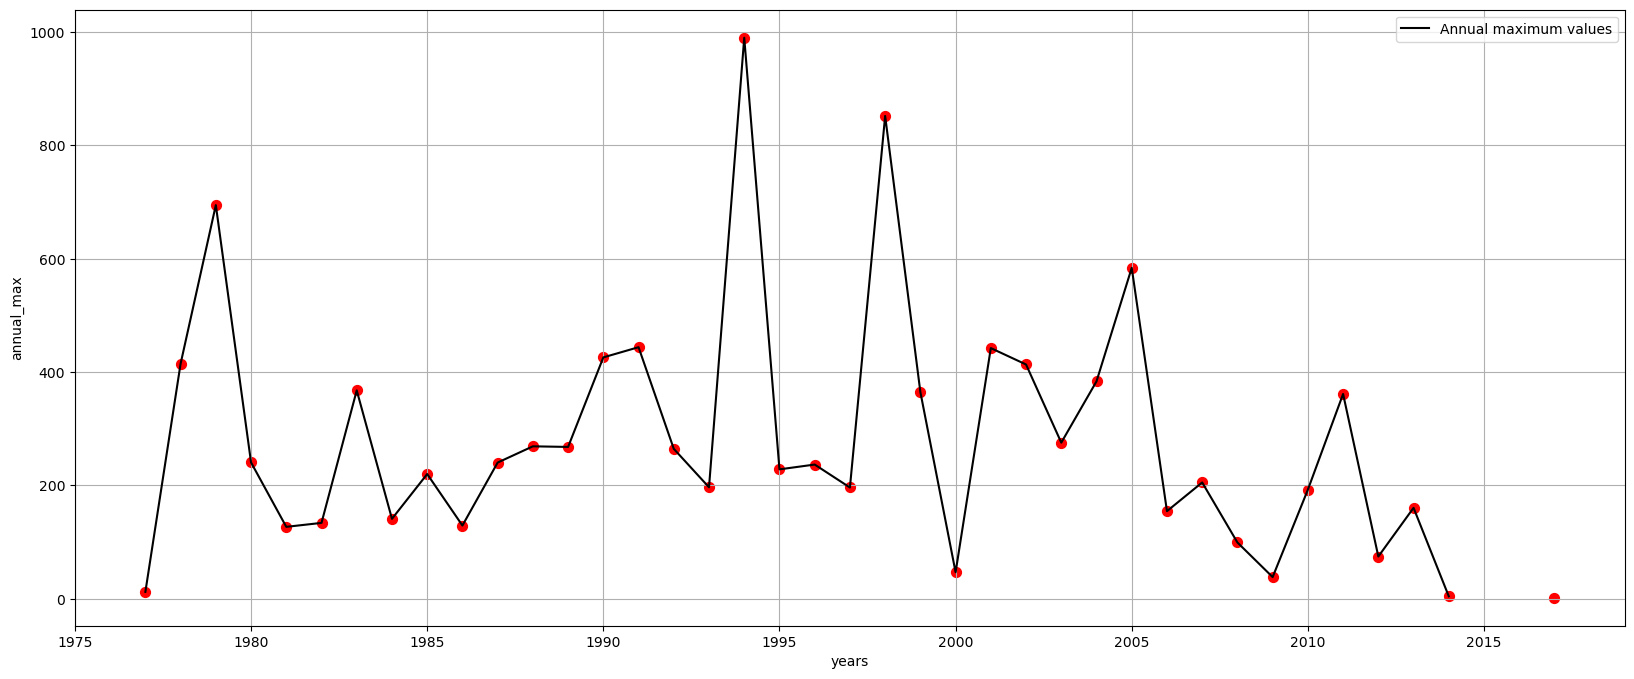

In [74]:
#plot the annual max values
plt.figure(figsize=(20,8))
plt.plot(annual_max['Year'],annual_max['Annual_Max'],color='black',label='Annual maximum values')
plt.scatter(annual_max['Year'],annual_max['Annual_Max'],color='red',s=50)
plt.grid()
plt.legend()
plt.xlabel('years')
plt.ylabel('annual_max')
plt.show()